In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import yaml

sys.path.insert(1, '../BuildDatabank/')
from databankLibrary import download_link, lipids_dict, molecule_numbers_dict
    
class databank():
    
    def __init__(self,path=r'../../Data/Simulations/'):
        self.path = path
        self.systems = []
        self.__load_systems__(path)

    def __load_systems__(self,path):
        for subdir, dirs, files in os.walk(path):
            for filename in files:
                filepath = os.path.join(subdir, filename)
                #print(filepath)
                if filename == "README.yaml":
                    with open(filepath) as yaml_file:
                        content = yaml.load(yaml_file, Loader=yaml.FullLoader)
                        content['path'] = filepath
                        self.systems.append(content)
                
    def get_systems(self):
        return self.systems
    
    def pie_temperature(self):
        list_feature = [ int(float(system['TEMPERATURE'])) for system in self.systems]
        import collections
        counter = collections.Counter(list_feature)
        plt.pie(counter.values(),labels=counter.keys(), normalize=True)


In [2]:
path = '../../Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()

Number of entries:  225
Total size of trajectories:  598.2808076078072 Gb
Total time of trajectories:  102481.19000000003 ns


Text(0, 0.5, 'Distribution')

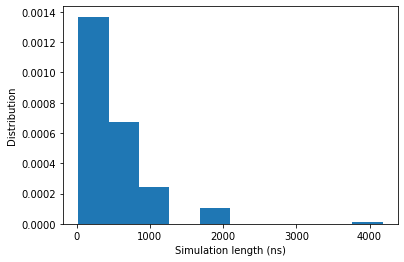

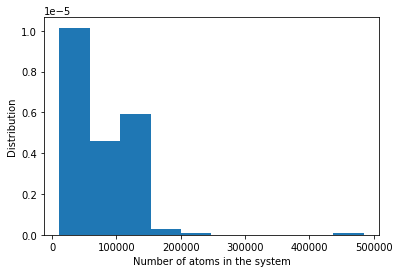

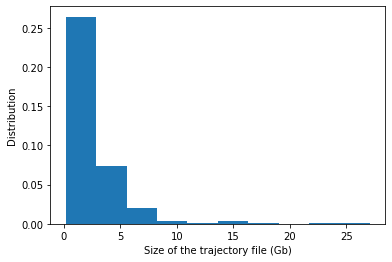

In [3]:
SimulationLengths = []
NumberOfAtoms = []
SizeOfTrajectories = []

for system in systems:
    SimulationLengths.append(system['TRJLENGTH']*0.001)
    NumberOfAtoms.append(system['NUMBER_OF_ATOMS'])
    SizeOfTrajectories.append(system['TRAJECTORY_SIZE']/(1024*1024*1024))
    
print("Number of entries: ",len(systems))
print("Total size of trajectories: ",str(np.sum(SizeOfTrajectories)) + ' Gb')
print("Total time of trajectories: ",str(np.sum(SimulationLengths)) + ' ns')

distSIMl = plt.hist(SimulationLengths, density=True)
plt.xlabel('Simulation length (ns)')
plt.ylabel('Distribution')
plt.figure()
distNatoms = plt.hist(NumberOfAtoms, density=True)
plt.xlabel('Number of atoms in the system')
plt.ylabel('Distribution')
plt.figure()
disttrjSIZE = plt.hist(SizeOfTrajectories, density=True)
plt.xlabel('Size of the trajectory file (Gb)')
plt.ylabel('Distribution')

In [4]:
ready = 0
notready = 0
for system in systems:
    try:
        tst = system['COMPOSITION'] 
        ready = ready + 1
    except:
        print(system,'\n')
        notready = notready + 1
        
print('ready',ready)
print('notready',notready)

ready 225
notready 0


In [5]:
ready = 0
notready = 0
for system in systems:
    try:        
        for molecule in system['COMPOSITION']:
            Nmolecule = np.sum(system['COMPOSITION'][molecule]['COUNT'])
            print(molecule,Nmolecule)
        ready = ready + 1
        print(system['DOI'],len(system['COMPOSITION']))
    except:
        notready = notready + 1
        
print('ready',ready)
print('notready',notready)

CHOL 22
POPC 200
SOL 9000
10.5281/zenodo.3237420 3
POPC 200
SOL 9000
SOD 81
CLA 81
10.5281/zenodo.35193 4
POPC 200
SOL 9000
10.5281/zenodo.4040423 2
POPS 128
SOL 4480
SOD 128
10.5281/zenodo.1129441 3
POPC 200
SOL 9000
CAL 73
CLA 146
10.5281/zenodo.45008 4
DAPC 232
CHOL 56
SOL 11520
10.5281/zenodo.2653721 3
POPC 400
POPG 100
SOL 18647
CAL 419
CLA 738
10.5281/zenodo.3483785 5
DOPC 260
CHOL 28
SOL 11520
10.5281/zenodo.2653721 3
DPPC 212
SOL 29826
10.5281/zenodo.3950029 2
DPPC 212
SOL 29826
10.5281/zenodo.3950029 2
POPC 150
POPG 150
SOD 150
SOL 31500
10.5281/zenodo.3997116 4
POPG 118
SOD 118
SOL 4110
10.5281/zenodo.1011096 3
CHOL 86
POPC 200
SOL 9000
10.5281/zenodo.3237420 3
POPC 256
SOL 10342
10.5281/zenodo.4537207 2
POPC 110
POPS 22
SOL 4929
POT 62
CLA 40
10.5281/zenodo.1493241 5
DPPC 72
SOL 2880
10.5281/zenodo.1009607 2
CHOL 50
POPC 200
SOL 9000
10.5281/zenodo.3237420 3
POPC 80
CHOL 80
SOL 4496
10.5281/zenodo.14068 3
POPC 250
POPG 250
SOL 18114
CAL 445
CLA 640
10.5281/zenodo.3483793 5
D

In [6]:
systems = db_data.get_systems()
systems

[{'AUTHORS_CONTACT': 'Javanainen, Matti',
  'COMPOSITION': {'CHOL': {'COUNT': [10, 12],
    'MAPPING': 'mappingCHOLESTEROLcharmm.txt',
    'NAME': 'CHL1'},
   'POPC': {'COUNT': [100, 100],
    'MAPPING': 'mappingPOPCcharmm.txt',
    'NAME': 'POPC'},
   'SOL': {'COUNT': 9000,
    'MAPPING': 'mappingTIP3PCHARMMgui.txt',
    'NAME': 'TIP3'}},
  'CPT': [['chol10_500ns.cpt']],
  'DATEOFRUNNING': '05/10/2021',
  'DIR_WRK': '/media/osollila/Data/tmp/DATABANK/',
  'DOI': '10.5281/zenodo.3237420',
  'FF': 'CHARMM36',
  'FF_DATE': None,
  'FF_SOURCE': 'CHARMM-GUI',
  'LOG': None,
  'NUMBER_OF_ATOMS': 55428,
  'PREEQTIME': 0,
  'PUBLICATION': None,
  'SOFTWARE': 'gromacs',
  'SOFTWARE_VERSION': 5.0,
  'SYSTEM': '22CHOL_200POPC_9000SOL_310K',
  'TEMPERATURE': 310.15,
  'TIMELEFTOUT': 0,
  'TOP': [['chol10.top']],
  'TPR': [['chol10.tpr']],
  'TRAJECTORY_SIZE': 1025713704,
  'TRJ': [['chol10_500ns.xtc']],
  'TRJLENGTH': 500100.0,
  'TYPEOFSYSTEM': 'lipid bilayer',
  'path': '../../Data/Simulations/

In [7]:
for system in systems:
    for feature in system.items():
        if "PC" in feature[0]:
            if feature[0][0] != 0:
                print(f"{feature} in {system['path']}\n")
    print(system)
    break
        

{'DOI': '10.5281/zenodo.3237420', 'SOFTWARE': 'gromacs', 'TRJ': [['chol10_500ns.xtc']], 'TPR': [['chol10.tpr']], 'PREEQTIME': 0, 'TIMELEFTOUT': 0, 'DIR_WRK': '/media/osollila/Data/tmp/DATABANK/', 'PUBLICATION': None, 'AUTHORS_CONTACT': 'Javanainen, Matti', 'SYSTEM': '22CHOL_200POPC_9000SOL_310K', 'SOFTWARE_VERSION': 5.0, 'FF': 'CHARMM36', 'FF_SOURCE': 'CHARMM-GUI', 'FF_DATE': None, 'CPT': [['chol10_500ns.cpt']], 'LOG': None, 'TOP': [['chol10.top']], 'COMPOSITION': {'CHOL': {'NAME': 'CHL1', 'MAPPING': 'mappingCHOLESTEROLcharmm.txt', 'COUNT': [10, 12]}, 'POPC': {'NAME': 'POPC', 'MAPPING': 'mappingPOPCcharmm.txt', 'COUNT': [100, 100]}, 'SOL': {'NAME': 'TIP3', 'MAPPING': 'mappingTIP3PCHARMMgui.txt', 'COUNT': 9000}}, 'TRAJECTORY_SIZE': 1025713704, 'TRJLENGTH': 500100.0, 'TEMPERATURE': 310.15, 'NUMBER_OF_ATOMS': 55428, 'DATEOFRUNNING': '05/10/2021', 'TYPEOFSYSTEM': 'lipid bilayer', 'path': '../../Data/Simulations/006/559/006559139e730fc43b244726992145c2f37a1461/3c99810c45a83b4ba0e54a69fdea88

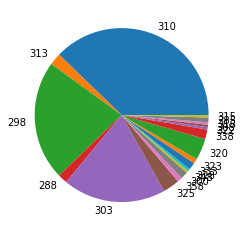

In [8]:
db_data.pie_temperature()

In [10]:
temps = [ int(float(system['TEMPERATURE'])) for system in systems]

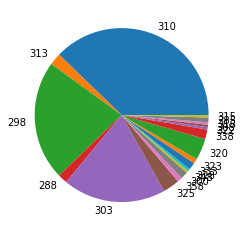

In [11]:
import collections
counter = collections.Counter(temps)
plt.pie(counter.values(),labels=counter.keys());

In [ ]:

lipids = [PC,PG, PS, PE, PI]
